In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [2]:
def f1(S, I, R):
    N = S + I + R
    return -beta*S*I/N

In [3]:
def f2(S, I, R):
    N = S + I + R
    return beta*S*I/N - gamma*I

In [4]:
def f3(S, I, R):
    N = S + I + R
    return gamma*I

In [5]:
def sir_model(S, I, R, beta, gamma):
    """
    Differential equations for the SIR model.

    Parameters:
        S: Number of susceptible individuals.
        I: Number of infectious individuals.
        R: Number of recovered individuals.
        beta: Transmission rate parameter.
        gamma: Recovery rate parameter.

    Returns:
        Tuple representing the derivatives of the SIR variables (dS/dt, dI/dt, dR/dt).
    """
    dS_dt = f1(S, I, R)
    dI_dt = f2(S, I, R)
    dR_dt = f3(S, I, R)
    return dS_dt, dI_dt, dR_dt

def euler_method(S0, I0, R0, beta, gamma, t_max, delta_t):
    num_steps = int(t_max / delta_t) + 1
    t = np.linspace(0, t_max, num_steps)
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    S[0] = S0
    I[0] = I0
    R[0] = R0

    for i in range(1, num_steps):
        dS_dt, dI_dt, dR_dt = sir_model(S[i-1], I[i-1], R[i-1], beta, gamma)
        
        # Update values using Euler method
        S[i] = S[i-1] + dS_dt * delta_t
        I[i] = I[i-1] + dI_dt * delta_t
        R[i] = R[i-1] + dR_dt * delta_t
        
        # Check for overflow or invalid values
        if np.isnan(S[i]) or np.isnan(I[i]) or np.isnan(R[i]):
            print("Simulation terminated due to overflow or invalid value.")
            break

    return t, S, I, R

# Example usage
S0 = 999 # broj nezarazenih na pocetku, koji su kandidati za zarazavanje
I0 = 1 # broj zarazenih na pocetku
R0 = 0 # broj izlecenih (imunih)
beta = 0.35 # rate of infection
gamma = 0.055 # rate of recovery
t_max = 100 
delta_t = 0.002 # korak

# beta = 0.3
# gamma = 0.015
# h = 0.002
# num_iters = 500
# S0 = 0.999
# I0 = 0.001
# R0 = 0

t, S, I, R = euler_method(S0, I0, R0, beta, gamma, t_max, delta_t)

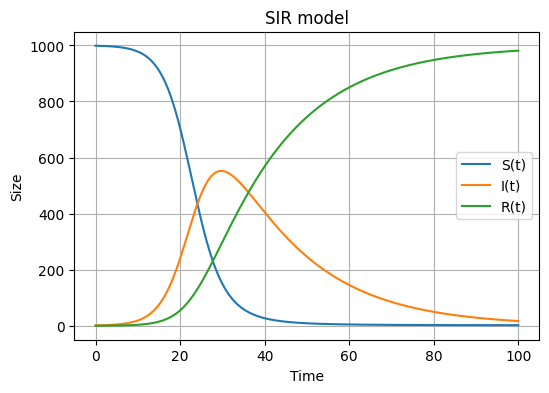

In [11]:
plt.figure(figsize = [6, 4])
plt.plot(t, S, label = "S(t)")
plt.plot(t, I, label = "I(t)")
plt.plot(t, R, label = "R(t)")

plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Size")
plt.title("SIR model")

plt.savefig('SIR.png')
plt.show()

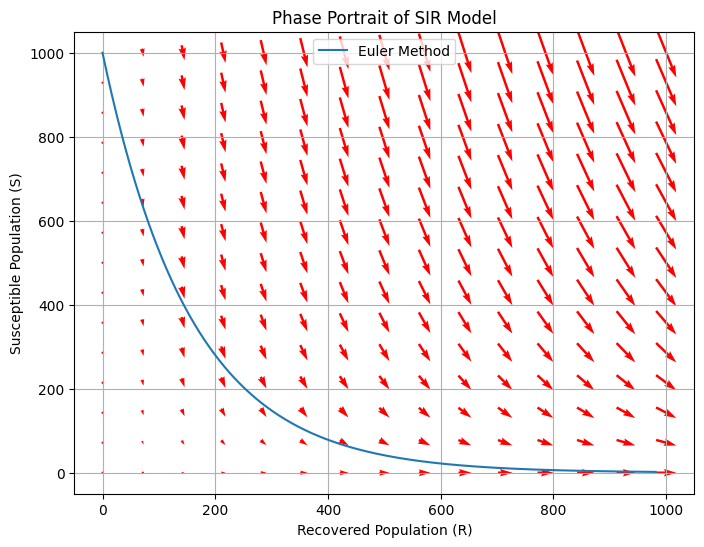

In [10]:
# Define the SIR model
def sir_model1(S, I, R, beta, gamma):
    N = S + I + R + 1e-7
    dS_dt = -beta*S*I/N
    dR_dt = gamma * I
    dI_dt = beta * S * I/N - gamma * I
    return dR_dt, dS_dt

# Create a grid of S and I values
S_grid = np.linspace(0, 1000, 15)
R_grid = np.linspace(0, 1000, 15)
I_grid = np.linspace(0, 600, 15)
R_grid, S_grid = np.meshgrid(R_grid, S_grid)

# Compute derivatives

# Vectorize the SIR model function
sir_model1_vec = np.vectorize(sir_model1)

# Compute derivatives
dR_dt, dS_dt = sir_model1_vec(S_grid, I_grid, R_grid, beta, gamma)

# dR_dt, dS_dt = sir_model1(S_grid, I_grid, R_grid, beta, gamma)

# Plot phase portrait with arrows
fig, ax = plt.subplots(figsize=(8, 6))

# Plot R and s from Euler's method
ax.plot(R, S, label='Euler Method')

# Plot vector field arrows
# magnitude = np.sqrt(dR_dt**2 + dI_dt**2)
# dR_dt_normalized = dR_dt / magnitude
# dI_dt_normalized = dI_dt / magnitude

ax.quiver(R_grid, S_grid, dR_dt, dS_dt, color='r', pivot='mid')

# Customize plot
ax.set_title('Phase Portrait of SIR Model')
ax.set_xlabel('Recovered Population (R)')
ax.set_ylabel('Susceptible Population (S)')
ax.legend()
ax.grid(True)

plt.savefig('phase.png')
plt.show()

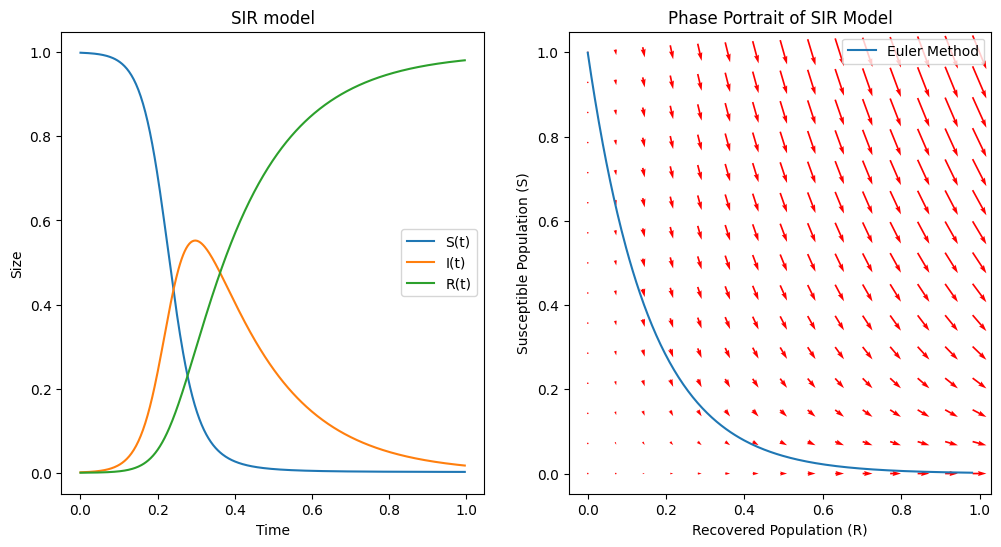

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker

def format_func_x(value, tick_number):
    return value / 100

def format_func_y(value, tick_number):
    return value / 1000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots side by side
ax2.quiver(R_grid, S_grid, dR_dt, dS_dt, color='r', pivot='mid')

ax1.set_xlabel("Time")
ax1.set_ylabel("Size")
ax1.set_title("SIR model")

ax2.set_title('Phase Portrait of SIR Model')
ax2.set_xlabel('Recovered Population (R)')
ax2.set_ylabel('Susceptible Population (S)')

# Assuming 't', 'S', 'I', and 'R' are lists or arrays
lines1 = {
    'S': ax1.plot([], [], label='S(t)')[0],
    'I': ax1.plot([], [], label='I(t)')[0],
    'R': ax1.plot([], [], label='R(t)')[0],
}

lines2 = {
    'Euler': ax2.plot([], [], label='Euler Method')[0],
}

ax1.legend()
ax2.legend()

# Define the step size
step = 100  # Adjust this value to your needs

ax1.xaxis.set_major_formatter(ticker.FuncFormatter(format_func_x))
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_func_y))
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_func_y))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_func_y))

def init():
    for line in lines1.values():
        line.set_data([], [])
    for line in lines2.values():
        line.set_data([], [])
    return list(lines1.values()) + list(lines2.values())

def update(frame):
    frame *= step  # Multiply the frame index by the step size
    for name, line in lines1.items():
        line.set_data(t[:frame:step], globals()[name][:frame:step])
    for name, line in lines2.items():
        line.set_data(R[:frame:step], S[:frame:step])
    ax1.relim()
    ax1.autoscale_view()
    ax2.relim()
    ax2.autoscale_view()
    return list(lines1.values()) + list(lines2.values())

ani = animation.FuncAnimation(fig, update, frames=len(t)//step, init_func=init, blit=True)
ani.save('animation_dynamic.gif', fps=60, writer='pillow')

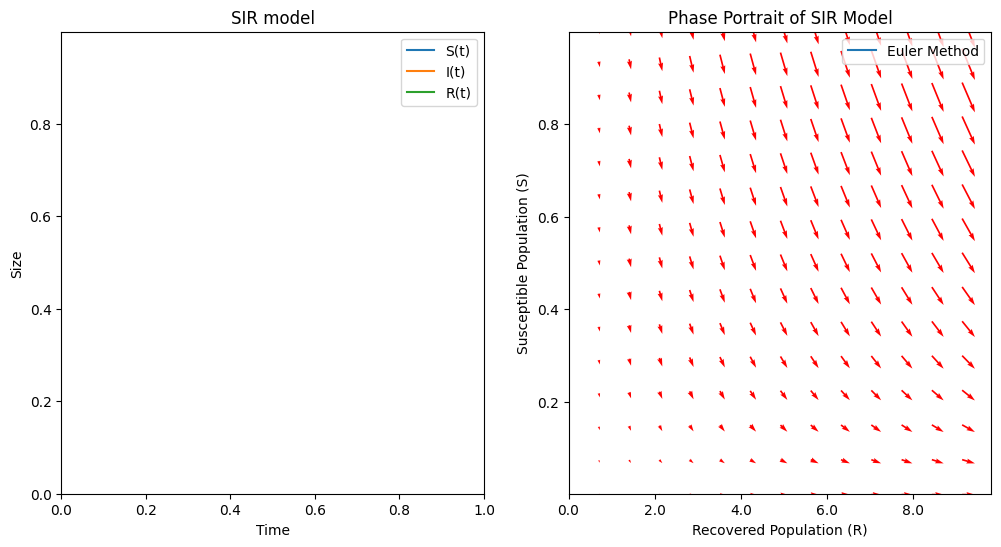

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker

def format_func_x(value, tick_number):
    return value / 100

def format_func_y(value, tick_number):
    return value / 1000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots side by side
ax2.quiver(R_grid, S_grid, dR_dt, dS_dt, color='r', pivot='mid')

ax1.set_xlabel("Time")
ax1.set_ylabel("Size")
ax1.set_title("SIR model")

ax2.set_title('Phase Portrait of SIR Model')
ax2.set_xlabel('Recovered Population (R)')
ax2.set_ylabel('Susceptible Population (S)')

# Assuming 't', 'S', 'I', and 'R' are lists or arrays
lines1 = {
    'S': ax1.plot([], [], label='S(t)')[0],
    'I': ax1.plot([], [], label='I(t)')[0],
    'R': ax1.plot([], [], label='R(t)')[0],
}

lines2 = {
    'Euler': ax2.plot([], [], label='Euler Method')[0],
}

ax1.legend()
ax2.legend()

# Define the step size
step = 100 # Adjust this value to your needs

# Set a fixed range for the x-axis
ax1.set_xlim(min(t), max(t))
ax2.set_xlim(min(R), max(R))

# Use the custom formatter function
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(format_func_x))
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_func_y))
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_func_x))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_func_y))

# Set a fixed range for the y-axis
ax1.set_ylim(min(min(S), min(I), min(R)), max(max(S), max(I), max(R)))
ax2.set_ylim(min(S), max(S))

def init():
    for line in lines1.values():
        line.set_data([], [])
    for line in lines2.values():
        line.set_data([], [])
    return list(lines1.values()) + list(lines2.values())

def update(frame):
    frame *= step  # Multiply the frame index by the step size
    for name, line in lines1.items():
        line.set_data(t[:frame:step], globals()[name][:frame:step])
    for name, line in lines2.items():
        line.set_data(R[:frame:step], S[:frame:step])
    return list(lines1.values()) + list(lines2.values())

ani = animation.FuncAnimation(fig, update, frames=len(t)//step, init_func=init)

ani.save('animation.gif', fps=60, writer='pillow')